In [1]:
import pandas as pd
import os

## Carga de datos

Cargar múltiples CSV en un mismo DataFrame de pandas, concatenados uno encima de otro.

In [3]:
# listar los archivos csv del directorio spotify usando os
file_names = os.listdir('../Data/spotify')
file_names

['1950.csv',
 '1960.csv',
 '1970.csv',
 '1980.csv',
 '1990.csv',
 '2000.csv',
 '2010.csv']

In [54]:
# bucle for para cargar uno a uno en pandas, concat para unirlos un dataframe global

df = pd.DataFrame() # dataframe vacío donde ir concatenando cada dataframe

for file_name in file_names:
    df_file = pd.read_csv('../Data/spotify/' + file_name)
    print(file_name, df_file.shape)
    df = pd.concat([df, df_file], ignore_index=True)
    
print(f"df final: {df.shape}")

1950.csv (73, 15)
1960.csv (97, 15)
1970.csv (104, 15)
1980.csv (105, 15)
1990.csv (88, 15)
2000.csv (100, 15)
2010.csv (100, 15)
df final: (667, 15)


In [6]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [11]:
# revisar concatenado
df.iloc[70:80]

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
70,71,Stairway Of Love,Terry Dene,NaN,2015,93,62,62,-7,25,86,120,55,4,27
71,72,I've Waited So Long,Anthony Newley,NaN,2012,137,36,27,-15,25,28,165,64,4,26
72,73,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
73,1,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
74,2,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
75,3,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
76,4,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78
77,5,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78
78,6,Fly Me To The Moon (In Other Words),Frank Sinatra,adult standards,1962,119,26,67,-14,6,37,147,45,5,76
79,7,I Want To Hold Your Hand - Remastered 2015,The Beatles,british invasion,2000,131,72,49,-6,31,87,146,39,5,74


In [55]:
# renombrar la columna pop a popularity
df = df.rename(columns = {
    'pop': 'popularity',
    'nrgy': 'energy'
})
df.head(2)

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      667 non-null    int64 
 1   title       667 non-null    object
 2   artist      667 non-null    object
 3   top genre   651 non-null    object
 4   year        667 non-null    int64 
 5   bpm         667 non-null    int64 
 6   energy      667 non-null    int64 
 7   dnce        667 non-null    int64 
 8   dB          667 non-null    int64 
 9   live        667 non-null    int64 
 10  val         667 non-null    int64 
 11  dur         667 non-null    int64 
 12  acous       667 non-null    int64 
 13  spch        667 non-null    int64 
 14  popularity  667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 78.3+ KB


In [14]:
df.isnull().sum()

Number         0
title          0
artist         0
top genre     16
year           0
bpm            0
energy         0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64

In [17]:
# Opción 1: rellenar los nulos de la columna 'top genre' con la palabra 'undefined'
# df['top genre'] = df['top genre'].fillna('undefined')
# df['top genre'].fillna('undefined', inplace=True)

In [16]:
# Opción 2: rellenar los nulos de la columna 'top genre' con la moda de esa columna
# top_genre_mode = df['top genre'].mode().iloc[0]
# df['top genre'].fillna(top_genre_mode, inplace=True)

'dance pop'

In [ ]:
# ver top genres de artistas
df[df['top genre'].isnull()]

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
31,32,If I Give My Heart To You,The Teddy Bears,NaN,2011,113,29,49,-10,12,29,118,86,3,40
32,33,The Lady Is A Tramp,Mel Torme & the Mel-Tones,NaN,2016,138,60,41,-8,41,54,170,81,6,40
42,43,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
50,51,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
57,58,No Other Love,Bob Sharples & His Music,NaN,2014,97,31,37,-10,27,10,171,69,3,31
58,59,Hot Diggity,Stargazers,NaN,2001,109,64,88,-9,60,96,134,61,11,31
65,66,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29
66,67,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
67,68,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
69,70,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,NaN,2012,142,38,65,-8,13,69,146,43,3,27


In [60]:
df[df['artist'] == 'Ike Carpenter Orchestra']

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
67,68,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28


In [ ]:
# Opción 3, rellenar con la moda de los artistas concretos para los que top_genre es null
# hemos comprobar que esos artistas tienen todas las canciones con top genre a nan por tanto no sirve
# se podría hacer por cercanía a estas columnas numéricas: bpm	energy	dnce	dB	live	val	dur	acous	spch
import numpy as np 

def mode(x):
    if not x.mode().empty:
        return x.mode().iloc[0]
    else:
        return np.nan
    
artist_top_genre_mode = df.groupby('artist')['top genre'].agg(mode)
artist_top_genre_mode

artist
 Wind & Fire                        disco
*NSYNC                           boy band
5 Seconds of Summer              boy band
50 Cent                east coast hip hop
ABBA                              europop
                              ...        
ZAYN                            dance pop
ZZ Top                         album rock
Zara Larsson                    dance pop
Zedd                           complextro
gnash                                 pop
Name: top genre, Length: 469, dtype: object

In [46]:
df[df['artist'] == 'The Teddy Bears']
# artist_top_genre_mode.get('The Teddy Bears')

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
31,32,If I Give My Heart To You,The Teddy Bears,NaN,2011,113,29,49,-10,12,29,118,86,3,40
42,43,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37


In [47]:
top_genre_mode = df['top genre'].mode().iloc[0] # moda global de top genre sin importar artista

def fill_top_genre_with_mode_by_artist(row): 
    if pd.isna(row['top genre']):
        #si es nulo devolvemos la moda top genre en base al artista. 
        # Si no existe artista entonces asigna la moda global
        # Si sí existe artista entonces asigna la moda de top genre para ese artista concreto
        mode = artist_top_genre_mode.get(row['artist'], top_genre_mode)
        print(f"artist: {row['artist']}, artist mode: {mode}, global mode: {top_genre_mode}")
        return mode if mode is not np.nan else top_genre_mode
    
    # si no es nulo lo devolvemos tal cual está 
    return row['top genre']
    
df['top genre'] = df.apply(fill_top_genre_with_mode_by_artist, axis=1)

artist: The Teddy Bears, artist mode: nan, global mode: dance pop
artist: Mel Torme & the Mel-Tones, artist mode: nan, global mode: dance pop
artist: The Teddy Bears, artist mode: nan, global mode: dance pop
artist: Joan Regan, artist mode: nan, global mode: dance pop
artist: Bob Sharples & His Music, artist mode: nan, global mode: dance pop
artist: Stargazers, artist mode: nan, global mode: dance pop
artist: Jayne Mansfield, artist mode: nan, global mode: dance pop
artist: Green Martini Keys, artist mode: nan, global mode: dance pop
artist: Ike Carpenter Orchestra, artist mode: nan, global mode: dance pop
artist: Suzi Miller And Johnson Brothers, artist mode: nan, global mode: dance pop
artist: Terry Dene, artist mode: nan, global mode: dance pop
artist: Anthony Newley, artist mode: nan, global mode: dance pop
artist: U.S.A. For Africa, artist mode: nan, global mode: dance pop
artist: Nick Kamen, artist mode: nan, global mode: dance pop
artist: Ten Sharp, artist mode: nan, global mode

In [49]:
df[df['artist'] == 'The Teddy Bears']

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
31,32,If I Give My Heart To You,The Teddy Bears,dance pop,2011,113,29,49,-10,12,29,118,86,3,40
42,43,Unchained Melody,The Teddy Bears,dance pop,2011,114,44,53,-8,13,47,139,49,3,37


In [53]:
df[df['artist'] == 'Nick Kamen']

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
437,59,I Promised Myself,Nick Kamen,dance pop,1990,128,80,58,-12,3,69,241,0,3,61


In [48]:
# Verificar que los nulos han sido rellenados:
df.isnull().sum()

Number        0
title         0
artist        0
top genre     0
year          0
bpm           0
energy        0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [21]:
# ver si hay duplicados y borrarlos:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [61]:
# Borrar columna Number:
df.drop('Number', axis=1, inplace=True)

In [62]:
df.head(3)

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61


In [66]:
# ordenar por año ascendente
# df = df.sort_values('year')
df.sort_values('year', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Gigi,Billy Eckstine,adult standards,1958,81,12,21,-17,12,19,155,93,3,35


In [67]:
df.tail()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
662,Marianne,The Hilltoppers,deep adult standards,2019,106,55,71,-8,19,82,137,73,4,33
663,When You Love Someone,James TW,neo mellow,2019,126,45,68,-6,5,35,217,26,3,76
664,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
665,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,2019,90,52,76,-4,7,93,158,53,6,86
666,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90


<Axes: >

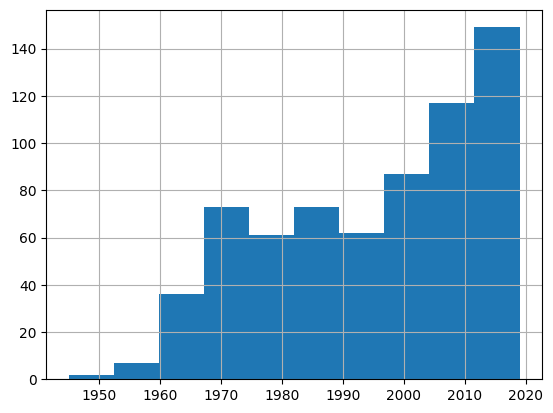

In [70]:
df['year'].hist() 

<Axes: >

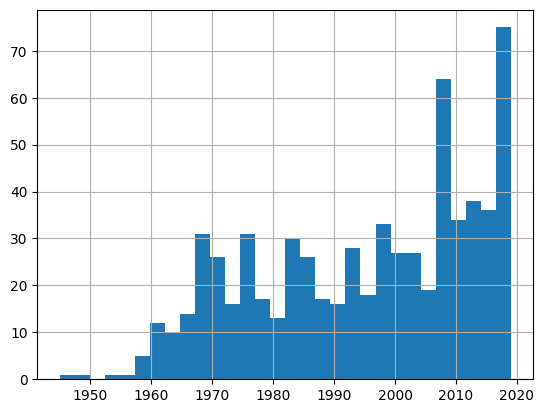

In [69]:
# visualizaciones
# df['year'].hist() # histograma de la columna year
df['year'].hist(bins=30)

<Axes: >

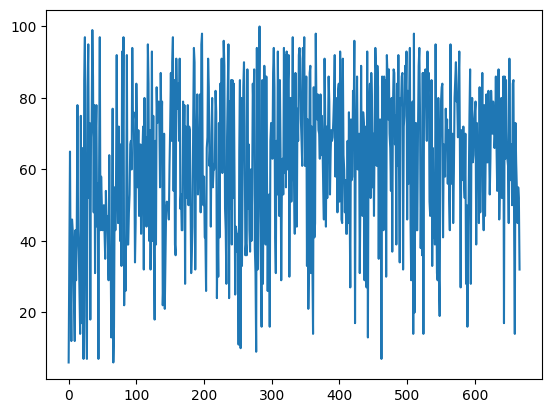

In [73]:
df['energy'].plot()

<Axes: >

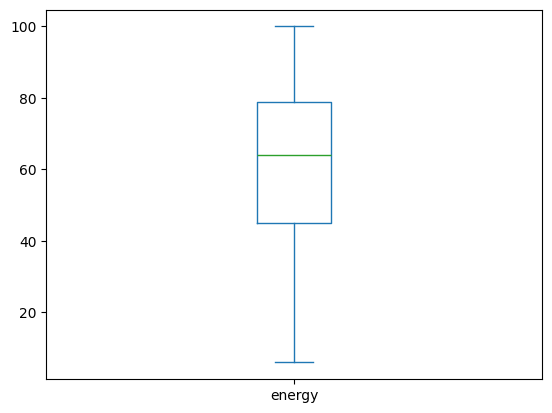

In [74]:
# el parámetro kind permite cambiar el tipo de gráfico
df['energy'].plot(kind='box')

In [80]:
# mostrar artistas más repetidos en DataFrame, usando value_counts
# df['artist'].value_counts()
pd.DataFrame(df['artist'].value_counts()).head(15)
# mostrar géneros más repetidos en DataFrame, usando value_counts

,count
artist,
Elton John,12
Queen,11
ABBA,9
The Beatles,7
Barbra Streisand,6
Whitney Houston,6
Rihanna,6
Taylor Swift,5
Mariah Carey,5


In [81]:
pd.DataFrame(df['top genre'].value_counts()).head(15)

,count
top genre,
dance pop,114
adult standards,93
album rock,77
glam rock,23
brill building pop,20
europop,17
dance rock,15
boy band,15
bubblegum dance,13


In [83]:
# Mostrar la canción más popular y la menos popular:
# idxmax y idxmin
# df['popularity'].max()

# posición de la canción más popular
df['popularity'].idxmax()

658

In [88]:
df.iloc[df['popularity'].idxmax()] #bad guy de billie eilish

title               bad guy
artist        Billie Eilish
top genre        electropop
year                   2019
bpm                     135
energy                   43
dnce                     70
dB                      -11
live                     10
val                      56
dur                     194
acous                    33
spch                     38
popularity               94
Name: 658, dtype: object

In [89]:
df.iloc[df['popularity'].idxmin()] 

title         Held for Questioning
artist                Rusty Draper
top genre     deep adult standards
year                          1953
bpm                            109
energy                          65
dnce                            70
dB                              -2
live                            14
val                             85
dur                            146
acous                           79
spch                             3
popularity                      26
Name: 2, dtype: object

In [93]:
# obtener la canción más popular por año
# groupby
filtro = df.groupby('year')['popularity'].idxmax()
df.iloc[filtro].tail(20)

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
351,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,83
370,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
380,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,83
384,Numb,Linkin Park,alternative metal,2003,110,86,50,-4,64,24,186,0,4,81
396,Yeah! (feat. Lil Jon & Ludacris),Usher,atl hip hop,2004,105,79,89,-5,4,58,250,2,11,79
410,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
418,So Sick,Ne-Yo,dance pop,2006,93,57,45,-8,19,58,207,25,31,77
425,Stronger,Kanye West,chicago rap,2007,104,72,62,-8,41,49,312,1,15,80
457,Umbrella,Rihanna,barbadian pop,2008,174,83,58,-5,4,57,276,1,13,80
474,Party In The U.S.A.,Miley Cyrus,dance pop,2009,96,70,65,-5,9,47,202,0,4,78


In [94]:
# crear columna década a partir de columna año
df['year'] / 10

0      194.5
1      194.8
2      195.3
3      195.7
4      195.8
       ...  
662    201.9
663    201.9
664    201.9
665    201.9
666    201.9
Name: year, Length: 667, dtype: float64

In [97]:
df['decade'] = df['year'] // 10 * 10
df.head()

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity,decade
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52,1940
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1940
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26,1950
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44,1950
4,Gigi,Billy Eckstine,adult standards,1958,81,12,21,-17,12,19,155,93,3,35,1950


In [100]:
# mover la columna decade a una posición concreta, antes o después de la columna year
# obtener la posición de la columna year
print(df.columns)
position = df.columns.get_loc('year')
position

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'popularity', 'decade'],
      dtype='object')


3

In [101]:
# sacar la columna decade se puede hacer con pop
serie_decade = df.pop('decade')
# insertar columna decade en posición obtenida
df.insert(position, 'decade', serie_decade)

In [102]:
df.head(3)

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1940,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1950,1953,109,65,70,-2,14,85,146,79,3,26


In [104]:
filtro = df.groupby('decade')['popularity'].idxmax()
df.iloc[filtro]

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
7,A Teenager In Love,Dion & The Belmonts,adult standards,1950,1959,79,38,56,-9,13,62,158,67,3,60
72,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1960,1969,129,54,56,-10,18,39,186,3,3,82
119,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1970,1975,71,40,41,-10,30,22,354,27,5,84
182,Africa,TOTO,album rock,1980,1982,93,37,67,-18,5,73,296,26,3,83
344,No Scrubs,TLC,atl hip hop,1990,1999,93,68,74,-4,7,59,214,3,10,79
351,In the End,Linkin Park,alternative metal,2000,2000,105,86,56,-6,21,40,217,1,6,83
658,bad guy,Billie Eilish,electropop,2010,2019,135,43,70,-11,10,56,194,33,38,94


<Axes: xlabel='year'>

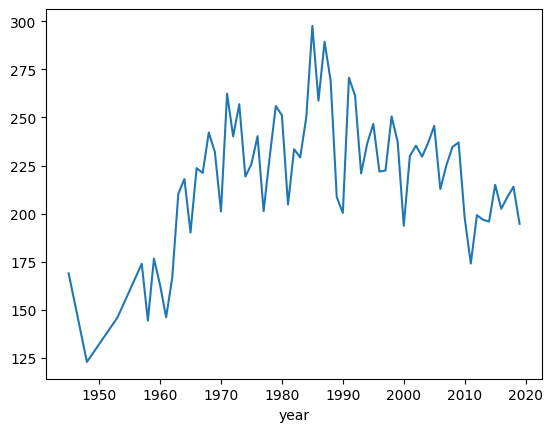

In [110]:
# calcular duración media por año y mostrarla con un plot
# print(df.groupby('year')['dur'].mean())
df.groupby('year')['dur'].mean().plot()
